In [1]:
import pandas as pd

In [2]:
df_counts_detections = pd.read_csv("DEFINITIVE_TABLES/DAYS_COUNTS_DETECTIONS_HOSP.csv")


In [3]:
df_counts_detections

,AGE_GROUP,GENDER,NATIONALITY,DISEASE,YEAR,MONTH,HOSPITAL,REGION,DOCTOR,SPECIALITY,DAYS_DETECTION_DIAGNOSTIC,VISITS_DETECTION_DIAGNOSTIC,COUNTS,EXTRA_HOSP,EXTRA_PROC
0,10-19,Female,Argentinian,Obesity,2009,11,Al Dhafra Hospitals,Al Dhafra,Mohammad Eid Ali,Family Medicine Clinic,1138,30,1,0,0
1,10-19,Female,Azerbaijani,Diabetes,2014,10,Tawam Hospital,Al Ain,Omran Ali Abdalla El-Koha,Family Medicine (Chronic Disease),291,9,1,0,0
2,10-19,Female,Egyptian,Obesity,2012,12,Al Ain Hospital,Al Ain,Ahmed Mohammed ALHashmi,General,999,2,1,0,0
3,10-19,Female,Ethiopian,Hypertension,2014,3,Sheikh Khalifa Medical City,Abu Dhabi,Babak Homapour,Family Medicine Clinic,628,15,1,0,0
4,10-19,Female,Ethiopian,Obesity,2014,8,Sheikh Khalifa Medical City,Abu Dhabi,Babak Homapour,Family Medicine Clinic,472,11,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41366,70+,Male,Yemeni,Hypertension,2012,8,Tawam Hospital,Al Ain,Omran Ali Abdalla El-Koha,Family Medicine Clinic,1353,36,1,7,2
41367,70+,Male,Yemeni,Hypertension,2014,4,Al Ain Hospital,Al Ain,Mohammad Asha,Family Medicine Clinic,372,1,1,0,0
41368,70+,Male,Yemeni,Hypertension,2015,12,SEHA Kidney Care (SKC),Abu Dhabi,Kinda Tawfik Dargam,Vascular Clinic,573,7,1,0,0
41369,70+,Male,Yemeni,Hypertension,2017,3,Tawam Hospital,Al Ain,Khalid Mohamed Ahmed Hassan Abdelgalil,Family Medicine (Chronic Disease),323,6,1,0,0


In [6]:
grouped_data = df_counts_detections.groupby(['REGION']).agg(
    DAYS_DETECTION_DIAGNOSTIC=('DAYS_DETECTION_DIAGNOSTIC', 'sum'),
    VISITS_DETECTION_DIAGNOSTIC=('VISITS_DETECTION_DIAGNOSTIC', 'sum'),
    EXTRA_HOSP=('EXTRA_HOSP', 'sum'),
    EXTRA_PROC=('EXTRA_PROC', 'sum')
).reset_index()


In [15]:
grouped_data

,HOSPITAL,DAYS_DETECTION_DIAGNOSTIC,VISITS_DETECTION_DIAGNOSTIC
0,Al Ain Hospital,5414773,141797
1,Al Ain Medical City - Rehabilitation Hospital,5346750,138459
2,Al Dhafra Hospitals,8987514,230903
3,Al Rahba Hospital,2996405,80399
4,Corniche Hospital,2647581,68365
5,SEHA Kidney Care (SKC),2475031,62972
6,Salma Rehabilitation Hospital,2522239,67638
7,Sheikh Khalifa Medical City,2624376,65213
8,Sheikh Shakhbout Medical City,2806850,69532
9,Tawam Hospital,5462285,138961


In [17]:
grouped_data = df_counts_detections.groupby(['HOSPITAL']).agg(
    DAYS_DETECTION_DIAGNOSTIC=('DAYS_DETECTION_DIAGNOSTIC', 'sum'),
    VISITS_DETECTION_DIAGNOSTIC=('VISITS_DETECTION_DIAGNOSTIC', 'sum')
).reset_index()

# Pie chart for DAYS_DETECTION_DIAGNOSTIC
chart_days = alt.Chart(grouped_data).mark_arc(outerRadius = 150, innerRadius = 50).encode(
    theta=alt.Theta(field="DAYS_DETECTION_DIAGNOSTIC", type="quantitative"),
    color=alt.Color(field="HOSPITAL", type="nominal", scale=alt.Scale(scheme='category20')),
    tooltip=[
        alt.Tooltip('HOSPITAL:N', title='Hospital:'),
        alt.Tooltip('DAYS_DETECTION_DIAGNOSTIC:Q', title='Days:', format=',')
    ]
)

# Pie chart for VISITS_DETECTION_DIAGNOSTIC
chart_visits = alt.Chart(grouped_data).mark_arc(outerRadius = 150, innerRadius = 50).encode(
    theta=alt.Theta(field="VISITS_DETECTION_DIAGNOSTIC", type="quantitative"),
    color=alt.Color(field="HOSPITAL", type="nominal", scale=alt.Scale(scheme='category20')),
    tooltip=[
        alt.Tooltip('HOSPITAL:N', title='Hospital:'),
        alt.Tooltip('VISITS_DETECTION_DIAGNOSTIC:Q', title='Visits:', format=',')
    ]
)

# Displaying both charts side by side
alt.hconcat(chart_days, chart_visits)


alt.HConcatChart(...)

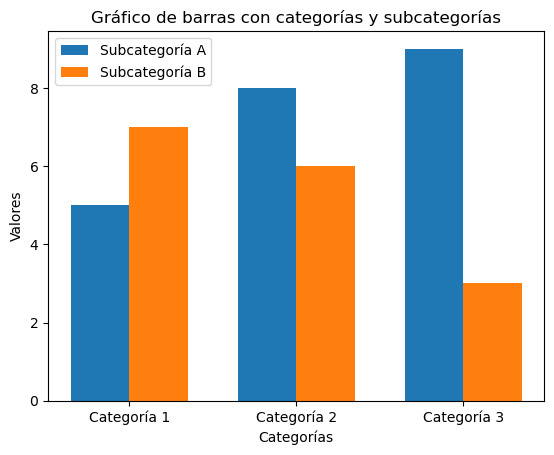

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
categorias = ['Categoría 1', 'Categoría 2', 'Categoría 3']
subcategorias = ['Subcategoría A', 'Subcategoría B']

# Valores de ejemplo para cada subcategoría en cada categoría principal
valores = {
    'Categoría 1': [5, 7],
    'Categoría 2': [8, 6],
    'Categoría 3': [9, 3]
}

# Preparar los datos para el gráfico
n_categorias = len(categorias)
n_subcategorias = len(subcategorias)
bar_width = 0.35
index = np.arange(n_categorias)

# Crear las barras para cada subcategoría
fig, ax = plt.subplots()
for i, subcategoria in enumerate(subcategorias):
    valores_subcat = [valores[categoria][i] for categoria in categorias]
    ax.bar(index + i * bar_width, valores_subcat, bar_width, label=subcategoria)

# Añadir etiquetas y título
ax.set_xlabel('Categorías')
ax.set_ylabel('Valores')
ax.set_title('Gráfico de barras con categorías y subcategorías')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categorias)
ax.legend()

# Mostrar el gráfico
plt.show()


In [2]:
#Read csv files
df_uniques = pd.read_csv("DEFINITIVE_TABLES/DIAGS_UNIQUE_ROW.csv")
df_uniques["NATIONALITY"] = df_uniques["NATIONALITY"].apply(lambda x : "Local" if x == "Israeli" else "Foreigner")
df_uniques.drop(["SWITCHDATE", "HOSPITAL", "DOCTOR", "SPECIALITY"], axis = 1, inplace = True)
df_uniques["DISEASE"] = df_uniques["DISEASE"].replace("No Diseases", float("NaN"))



In [40]:
disease_count_per_id = pd.DataFrame(pd.DataFrame(df_uniques[df_uniques["DISEASE"] != "No Diseases"].groupby('ID')['DISEASE'].count()).reset_index()["DISEASE"].value_counts()).reset_index()

In [41]:
disease_count_per_id

,DISEASE,count
0,0,201309
1,1,38081
2,2,24566
3,3,16167
4,4,11028
5,5,6011
6,6,2238
7,7,312


In [16]:
df_uniques[df_uniques["DISEASE"] == "No Diseases"]

,GENDER,ID,YEAR,NATIONALITY,REGION,AGE_GROUP,DISEASE
1,Female,Patient_10000048_1,2001,Local,Abu Dhabi,20-29,No Diseases
2,Female,Patient_10000068_1,2005,Local,Al Ain,10-19,No Diseases
4,Female,Patient_10000102_1,1997,Local,Abu Dhabi,20-29,No Diseases
5,Male,Patient_10000108_1,1999,Local,Al Ain,20-29,No Diseases
6,Male,Patient_10000115_1,2000,Local,Abu Dhabi,20-29,No Diseases
...,...,...,...,...,...,...,...
426793,Male,Patient_19999750_1,1979,Local,Abu Dhabi,40-49,No Diseases
426794,Female,Patient_19999782_1,2002,Local,Al Ain,20-29,No Diseases
426795,Male,Patient_19999784_1,1967,Local,Abu Dhabi,50-59,No Diseases
426797,Female,Patient_19999829_1,1996,Local,Al Ain,20-29,No Diseases


In [12]:
a=df_uniques[df_uniques["DISEASE"] == "CKD"].groupby(['GENDER', 'AGE_GROUP']).size().reset_index()
a.columns = ["GENDER", "AGE_GROUP", "COUNT"]

In [21]:
import pandas as pd
import altair as alt

# Sample data
data = pd.DataFrame({
    'category': ['MALE', 'MALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE'],
    'subcategory': ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69'],
    'value': [10, 20, 30, 40, 50, 60]
})

# Creating a tree map with a hot scale color
tree_map = alt.Chart(a).mark_rect().encode(
    y=alt.Y('GENDER:N', title='Category'),
    x=alt.X('AGE_GROUP:N', title='Subcategory'),
    color=alt.Color('COUNT:Q', scale=alt.Scale(scheme='reds'), title='Count'),
    size='COUNT:Q').properties(
    width=500,
    height=150,
)

tree_map




alt.Chart(...)

In [1]:
import pandas as pd

# Creating DataFrame for Disease Cases
df_disease_cases = pd.DataFrame({
    'Disease': ['Diabetes', 'Heart Disease', 'Dyslipidemia', 'Nash', 'CKD', 'Hypertension'],
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Male', 'Female'],
    'Cases': [30000, 28000, 15000, 13000, 8500, 3650]
})

# Creating DataFrame for Disease Speciality
df_disease_speciality = pd.DataFrame({
    'Disease': ['Diabetes', 'Heart Disease', 'Dyslipidemia', 'Nash', 'CKD', 'Obesity'],
    'Speciality': ['Endocrinology', 'Cardiology', 'Endocrinology', 'Hepatology', 'Nephrology', 'Bariatric']
})

df_disease_speciality

,Disease,Speciality
0,Diabetes,Endocrinology
1,Heart Disease,Cardiology
2,Dyslipidemia,Endocrinology
3,Nash,Hepatology
4,CKD,Nephrology
5,Obesity,Bariatric


In [2]:
# Melting the df_disease_cases DataFrame to have a long format
melted_df_disease_cases = pd.melt(df_disease_cases, id_vars=['Disease'], value_vars=['Gender', 'Cases'],
                                  var_name='Attribute', value_name='Value')
melted_df_disease_cases


,Disease,Attribute,Value
0,Diabetes,Gender,Male
1,Heart Disease,Gender,Male
2,Dyslipidemia,Gender,Female
3,Nash,Gender,Female
4,CKD,Gender,Male
5,Hypertension,Gender,Female
6,Diabetes,Cases,30000
7,Heart Disease,Cases,28000
8,Dyslipidemia,Cases,15000
9,Nash,Cases,13000


In [20]:
df_disease_cases


,Disease,Gender,Cases
0,Diabetes,Male,30000
1,Heart Disease,Male,28000
2,Dyslipidemia,Female,15000
3,Nash,Female,13000
4,CKD,Male,8500
5,Hypertension,Female,3650


In [29]:
# Performing an inner join on the two dataframes based on the 'Disease' column
merged_df = pd.merge(df_disease_cases, df_disease_speciality, on='Disease', how='outer')
merged_df


,Disease,Gender,Cases,Speciality
0,Diabetes,Male,30000.0,Endocrinology
1,Heart Disease,Male,28000.0,Cardiology
2,Dyslipidemia,Female,15000.0,Endocrinology
3,Nash,Female,13000.0,Hepatology
4,CKD,Male,8500.0,Nephrology
5,Hypertension,Female,3650.0,NaN
6,Obesity,NaN,NaN,Bariatric
